<a href="https://colab.research.google.com/github/wp225/perceptron-iris/blob/main/perceptron_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np

In [5]:
class perceptron(object):
  def __init__(self,eta=.2,n_iter=3,seed=1):
    self.eta=eta
    self.n_iter=n_iter
    self.seed=seed
  
  def fit(self,X,Y):
    rgen=np.random.RandomState(self.seed)
    self.wt=rgen.Normal(loc=0.0,scale=0.01,size=1+X.shape[1])
    self.error=[]
    for _ in range(self.n_iter):
      error=0
      for xi,target in zip(X,Y):
        update=self.eta*(target-self.predict(xi))
        self.wt[1:]=self.wt+update*xi #normal weights 
        self.wt[0]=self.wt[0]+update #bias
        error=error+int(update!=0.0)
    return self
  
  def input(self,X):
    return np.dot(X,self.wt[1:]+self.wt[0])
  
  def predict(self,X):
    return np.where(self.input>=0,1,-1) #returns 1 if ip >0 else -1 

        



In [7]:
import os 
import pandas as pd

url=os.path.join('https://archive.ics.uci.edu', 'ml','machine-learning-databases','iris','iris.data')
df=pd.read_csv(url,header=None)

In [12]:
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [14]:
df[4].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [22]:
Y=df.iloc[0:100,4].values

In [33]:
Y=np.where(Y=='Iris-setosa',1,-1)

In [34]:
Y

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [ ]:
X=df.iloc[0:100,[0,2]].values
X

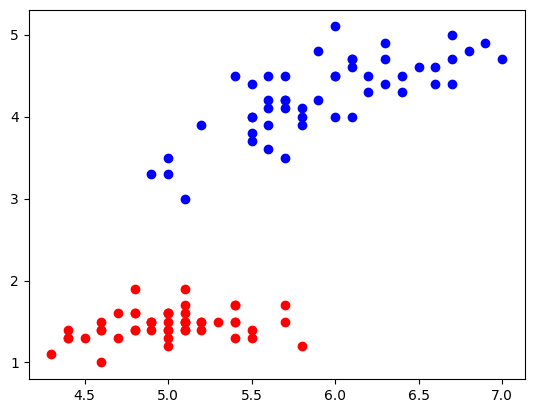

In [45]:
import matplotlib.pyplot as plt 
plt.scatter(X[:50,0],X[0:50,1],color='red')
plt.scatter(X[50:,0],X[50:,1],color='blue')
plt.show()